In [6]:
%matplotlib widget
import cv2
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.widgets import RectangleSelector
from sklearn.metrics import pairwise_distances_argmin_min

In [7]:
# Load image and convert to RGB
img = cv2.imread('FLIR0454.jpg')
if img is None:
    raise FileNotFoundError("Image 'FLIR0454.jpg' not found. Place it in the same directory as this notebook.")
img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

In [8]:
# Define simulated RGB-to-temperature colorbar
colormap = [([0, 0, 128], 23.0), ([0, 128, 255], 24.5), ([0, 255, 0], 25.5),
            ([255, 255, 0], 26.5), ([255, 0, 0], 28.0)]
colors, temps = zip(*colormap)
colors = np.array(colors)
flat_pixels = img_rgb.reshape(-1, 3)
indices, _ = pairwise_distances_argmin_min(flat_pixels, colors)
temp_map = np.array(temps)[indices].reshape(img_rgb.shape[:2])

In [9]:
# ROI callback function
defined_roi = {}

def onselect(eclick, erelease):
    x1, y1 = int(eclick.xdata), int(eclick.ydata)
    x2, y2 = int(erelease.xdata), int(erelease.ydata)
    roi = temp_map[min(y1, y2):max(y1, y2), min(x1, x2):max(x1, x2)]
    defined_roi['data'] = roi
    mean_temp = np.mean(roi)

    fig, ax = plt.subplots()
    im = ax.imshow(temp_map, cmap='plasma', vmin=23, vmax=28)
    plt.colorbar(im, ax=ax, label='Temperature (°C)')
    ax.add_patch(plt.Rectangle((min(x1,x2), min(y1,y2)), abs(x2-x1), abs(y2-y1),
                               edgecolor='cyan', facecolor='none', linewidth=2))
    ax.set_title(f"Selected ROI | Mean Temp: {mean_temp:.2f}°C")
    plt.axis('off')
    plt.show()

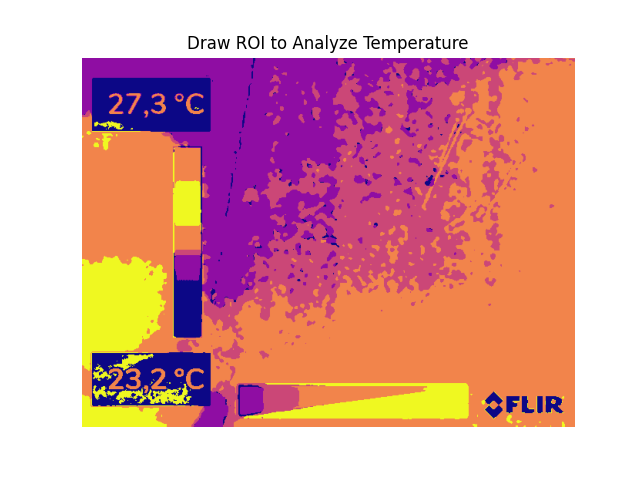

In [10]:
# Enable interactive ROI selection
fig, ax = plt.subplots()
ax.imshow(temp_map, cmap='plasma', vmin=23, vmax=28)
plt.title("Draw ROI to Analyze Temperature")
plt.axis('off')

selector = RectangleSelector(ax, onselect,
                             useblit=True,
                             button=[1],
                             minspanx=5, minspany=5,
                             spancoords='pixels',
                             interactive=True)
plt.show()